In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from src.text_factorization import lemmatize_tokens
from src.stopwords import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from src.plot_silhouette import knife_graph
from src.model_analysis import *
%matplotlib inline

In [2]:
df = pd.read_pickle('data/working_corpus.pkl')

In [3]:
#note lem_tokens, length and genre have been saved and pickled from previous sessions 
#they are not set in stone and can be experimented further with stopwords.py and text_factorization.py
df.head()

,special,text,lem_tokens,length,genre
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome...","[billy, not, well, man, well, word, later, nic...",64226,Crude UK
1,Hannah Gadsby Douglas,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit...",57454,Polite UK
2,Patton Oswalt I Love Everything,This is the full transcript of Patton Oswalt: ...,"[extreme, high, low, last, few, year, actor, c...",45350,Relationship & Sex
3,Russell Peters Deported,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[going, bring, brother, gave, somebody, going,...",57631,Impressionists/Dialogue
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",44520,Bro/Culture


In [4]:
#lem_tokens = lemmatize_tokens(df['text'])
#df['lem_tokens'] = lem_tokens

In [5]:
tf = TfidfVectorizer(max_features=10000, stop_words=stopwords(), max_df=0.76, ngram_range=(1,3))
corpus_vector = tf.fit_transform(df.lem_tokens.apply(lambda ls: ' '.join(ls))).toarray()

For n_clusters = 2 The average silhouette_score is : 0.018925286824300773
For n_clusters = 3 The average silhouette_score is : 0.017479693084788254
For n_clusters = 4 The average silhouette_score is : 0.015532173820225318
For n_clusters = 5 The average silhouette_score is : 0.01559679124191383
For n_clusters = 6 The average silhouette_score is : 0.013624936162887662
For n_clusters = 7 The average silhouette_score is : 0.012637429445575435
For n_clusters = 8 The average silhouette_score is : 0.010922857425495779
For n_clusters = 9 The average silhouette_score is : 0.012349800580384603
For n_clusters = 10 The average silhouette_score is : 0.011252507151661813
For n_clusters = 11 The average silhouette_score is : 0.012126766280381805


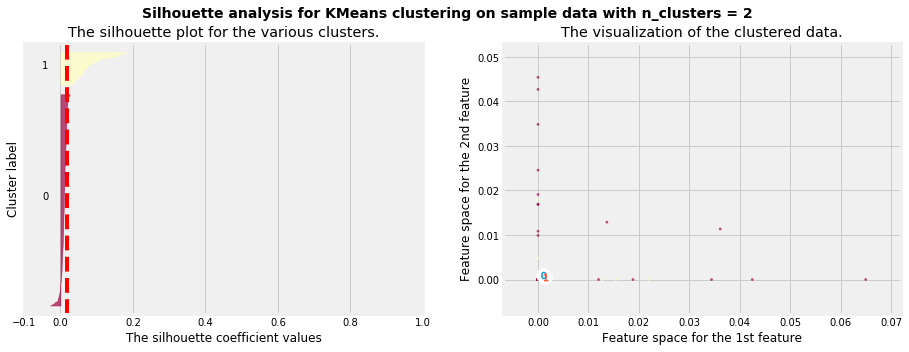

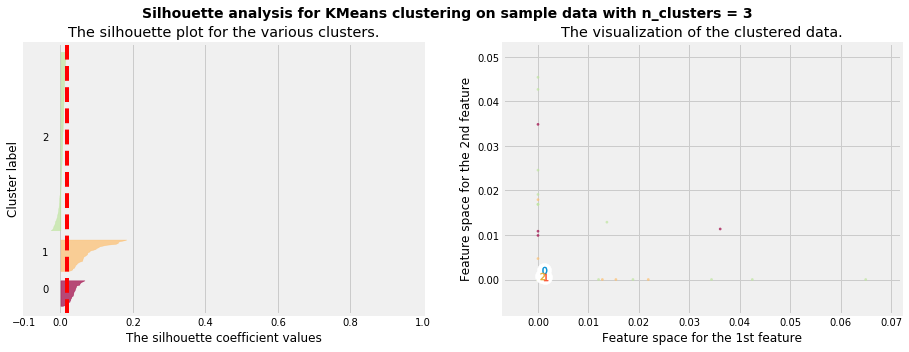

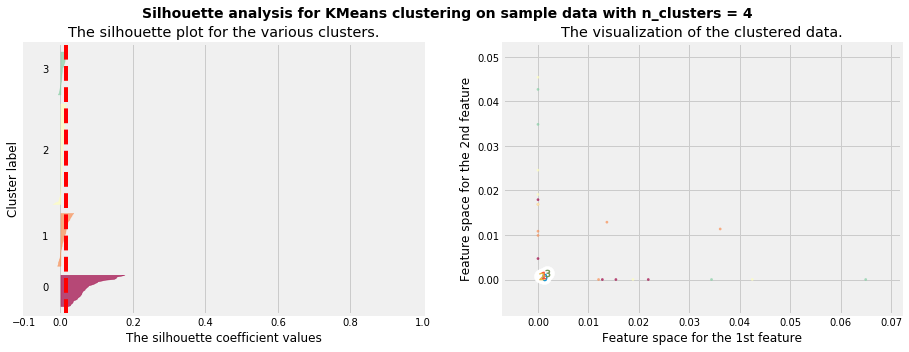

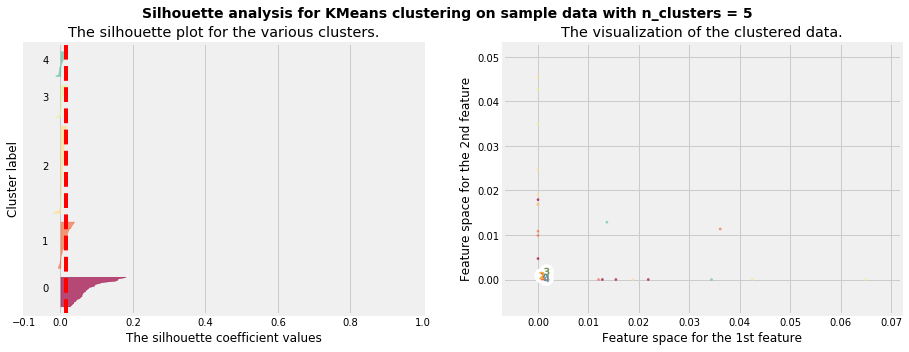

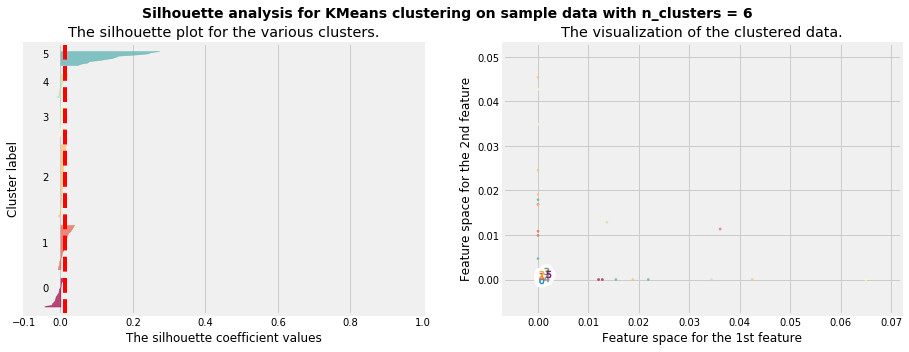

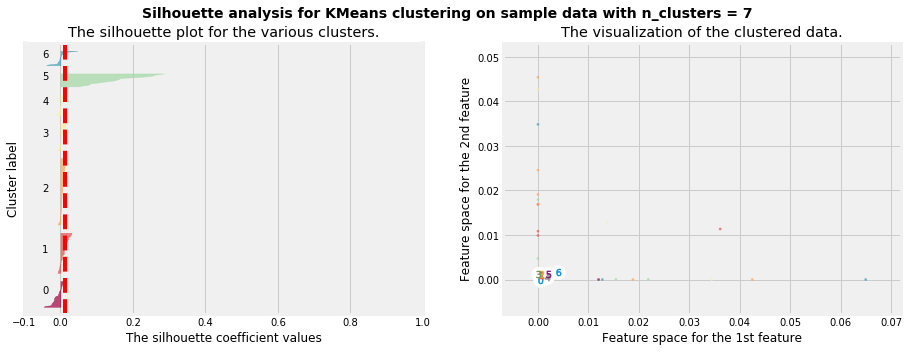

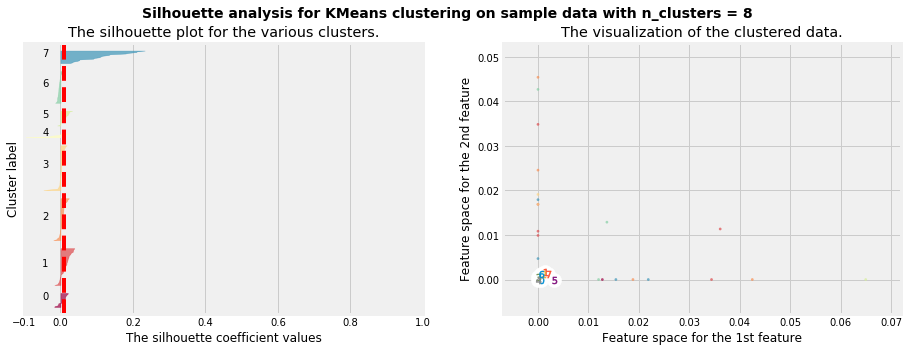

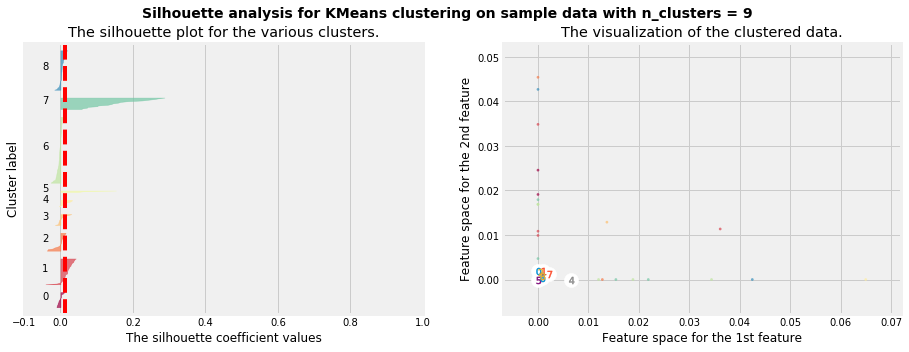

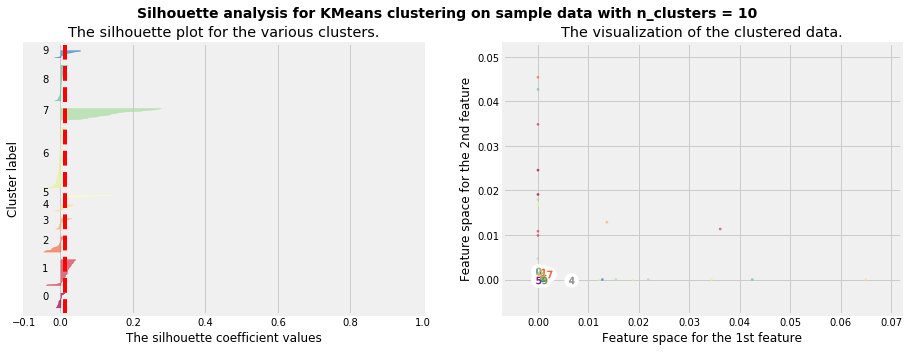

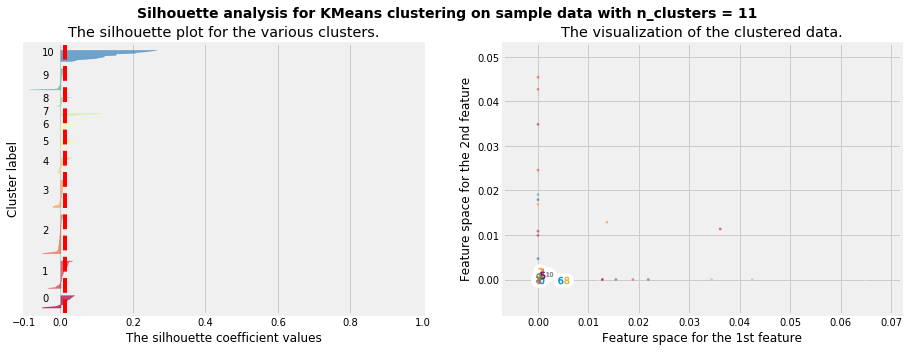

In [6]:
knife_graph(corpus_vector, range(2,12))
plt.show()

In [7]:
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans_labels = kmeans.fit_predict(corpus_vector)

In [8]:
print_top_words(kmeans, n_clusters, tf.get_feature_names())

Topic 0:
aint, motherfucker, yall, nigger, bitch, mama, goddamn, ima, damn, nigga, wan, wan na, dick, pussy, aint gon, aint gon na, co, somebody, white folk, nobody, brother, fuckin, folk, nothin, mcdonalds, fucked, mad, white woman, yo, dude
Topic 1:
co, mum, ok, mate, quite, sort, bloke, er, voice, round, anyone, lovely, fat, gay, um, accent, panda, brilliant, everyone, moment, biscuit, fuckin, obviously, theyve, wan, wan na, cock, film, cunt, gandhi
Topic 2:
dick, wan na, wan, pussy, dude, gay, married, nobody, somebody, mom, fat, bitch, aint, motherfucker, porn, midget, drink, wedding, bar, parent, youre gon na, youre gon, father, suck, date, anymore, game, hair, titty, food
Topic 3:
dude, mom, cheer, chuckle, dick, asian, wan na, wan, imitates, um, mexican, yo, bitch, somebody, voice, youre gon na, youre gon, parent, amazing, music, latino, whoa, party, bro, accent, crowd, everyone, huh, indian, song
Topic 4:
wee, cunt, mate, scottish, shite, yknow, fucken, scotland, hank, cock, r

In [9]:
#This doesn't seem to be producing as good results in terms of classification
#While the category vocab is similar, the ratio of each topic's influence on a special would require a lot of math 
#to optimize how we cluster them - this method can be useful for further exploration of 'hybridity' of specials though
n_components = 10
nmf = NMF(n_components=n_components, alpha=0.0, max_iter=300, random_state=10)
W = nmf.fit_transform(corpus_vector)

In [10]:
print_top_words(nmf, n_components, tf.get_feature_names())

Topic 0:
wan na, wan, dont wan na, dont wan, married, youre gon na, youre gon, outta, bathroom, hiking, text, cheese, pant, kinda, cat, nobody, food, candy, dunno, commercial, dennys, bag, italian, game, dude, pee, anymore, restaurant, date, amazing
Topic 1:
nigga, motherfucker, yall, aint, bitch, motherfucking, trump, goddamn, dick, nigga nigga, police, bitch nigga, nigga dont, yo, pussy, oj, hood, iceberg, pop pop, jacksonville, mad, shit nigga, weed, obama, nigga aint, mama, poor white, barack, gay, brother
Topic 2:
mate, wee, mum, cunt, bloke, sort, quite, scottish, fat, cock, accent, scotland, shite, round, lm, brilliant, anyone, britain, lovely, panda, theyve, mr, gay, disabled, shop, obviously, nan, gig, quid, hed
Topic 3:
aint, motherfucker, yall, nigger, mama, bitch, damn, pussy, goddamn, aint gon na, aint gon, dick, brother, white folk, nothin, somebody, fucked, nobody, wan na, wan, folk, president, somethin, shit aint, jail, rich, ima, mad, motherfucking, talkin
Topic 4:
dic

In [18]:
df[(kmeans_labels==10)]

,special,text,lem_tokens,length,genre
42,Arsenio Hall Smart And Classy,"Ladies and gentlemen, Arsenio Hall. Whats up? ...","[san, jose, long, time, such, wonderful, night...",44618,Black: Lots of Race
50,Dave Chappelle Sticks Stones,Sticks & Stones is Dave Chappelles fifth Netfl...,"[freeman, narrates, chappelle, swagger, salt, ...",41592,Black: DefJam-Adjacent
56,Mike Epps Only One Mike,Washington D.C. are you ready? \n Its about t...,"[up, give, up, give, up, mike, epps, give, up,...",41414,Black: DefJam-Adjacent
63,Cedric The Entertainer Live From The Ville,[slow jazz music playing] [Ice Cube] He one of...,"[make, look, jimmie, walker, legend, game, chr...",42790,Black: DefJam-Adjacent
126,Deray Davis How To Act Black,"[male announcer] ATL, get ready for the man of...","[sold, out, tour, youve, seen, tv, movie, repr...",51036,Black: DefJam-Adjacent
143,Eddie Griffin Undeniable 2018,[] [notification beep] [] [cheers and applause...,"[sit, down, sit, down, yall, let, yes, indeed,...",46961,Black: DefJam-Adjacent
147,Marlon Wayans Wokeish,"How the fuck we doing, DC? We good? That music...","[shootout, club, music, man, make, feel, punch...",47468,Black: DefJam-Adjacent
154,Chris Rock Bring Pain,Live from the Takoma Theatre in Washington D.C...,"[chris, rock, washington, chocolate, city, tha...",41563,Black: Lots of Race
156,Chris Rock Tamborine,[indistinct overlapping chatter] [woman] Ladie...,"[please, sit, down, sit, yo, ass, down, please...",38322,Black: Lots of Race
162,Katt Williams Great America 2018,[announcer] You seen him on Pimpin Pimpin. You...,"[internet, down, give, up, king, underground, ...",42148,Black: DefJam-Adjacent


In [13]:
df[(kmeans_labels==7)]

,special,text,lem_tokens,length,genre
20,Tom Segura Ball Hog,"[crowd cheering, applauding] [whistling] [whoo...","[thank, very, much, great, austin, texas, um, ...",50393,Bro/Culture
21,Bert Kreischer Hey Big Boy,[electronic music playing] [male announcer] La...,"[up, cleveland, whooping, took, shit, bathroom...",46189,Bro/Culture
83,Gabriel Fluffy Iglesias One Show Fits All,[crowd chanting] Fluffy! Fluffy! [Fluffy shout...,"[three, two, one, macho, macho, man, ive, mach...",61094,Bro/Culture
115,Bert Kreischer Secret Time,[applause] [male presenter] Ladies and gentlem...,"[crowd, crowd, louder, yes, crowd, yeah, lower...",44408,Bro/Culture


In [14]:
genre_dict = {
    0: 'Black: Racially Charged',
    1: 'Polite UK',
    2: 'Relationship & Sex',
    3: 'Bro/Culture',
    4: 'Crude UK',
    5: 'Impressionists/Dialogue', 
    6: 'White Political',
    7: 'Bro/Culture', #This category is a little small so we'll throw it into bro/culture
    8: 'Anne Frank & Food',
    9: 'Domesticated Observations',
    10: 'Black Political'
}

df['genre'] = [genre_dict[label] for label in kmeans_labels]
df.head()

,special,text,lem_tokens,length,genre
0,Billy Connolly High Horse Tour Live,"Ladies and gentlemen, would you please welcome...","[billy, not, well, man, well, word, later, nic...",64226,Crude UK
1,Hannah Gadsby Douglas,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit...",57454,Polite UK
2,Patton Oswalt I Love Everything,This is the full transcript of Patton Oswalt: ...,"[extreme, high, low, last, few, year, actor, c...",45350,Relationship & Sex
3,Russell Peters Deported,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[going, bring, brother, gave, somebody, going,...",57631,Impressionists/Dialogue
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",44520,Bro/Culture


In [ ]:
##### genre_dict = {
    0: 'Short Jokes',
    1: 'British/Highbrow',
    2: 'Situational Comedy',
    3: 'Topical American',
    4: 'Black: Lots of Race',
    5: 'British Political', #This category is just a handful of Carlin specials
    6: 'British Political',
    7: 'US Outsider',
    8: 'Dirty, Dating',
    9: 'Voice Work',
    10: 'Black: DefJam-Adjacent'
}

df['genre'] = [genre_dict[label] for label in kmeans_labels]
df.head()

In [15]:
df.to_pickle('data/working_corpus.pkl')